<a href="https://colab.research.google.com/github/Min-ju-Kim/AIFFEL_Going-Deeper/blob/main/4.%20Object%20Detection/%5BGD_8%5DObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Going Deeper 8. Object Detection

### Table of Contents

### 1. Experiment Environment Set-up
* 1.1 Import Libraries

### 2. KITTI Dataset
* 2.1 Load Data
* 2.2 Data Explorations

### 3. Preparing Data
* 3.1 Build a Data Pipeline
* 3.2 Encoding

### 4. Build the Model
* 4.1 Feature Pyramid
* 4.2 Loss

### 5. Model Training

### 6. Check the Results

### 7. Creating an Autonomous Driving System
* 7.1 Autonomous Driving System
* 7.2 System Evaluating

### 8. Retrospection

****

### 1. Experiment Environment Set-up

### 1.1 Import Libraries

In [1]:
import os, copy
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

DATA_PATH = '/content/sample_data/object_detection/data'

print('üå∏~')

üå∏~


### 2. KITTI Dataset

* [cvlibsÏóêÏÑú Ï†úÍ≥µÌïòÎäî KITTI Îç∞Ïù¥ÌÑ∞ÏÖã](http://www.cvlibs.net/datasets/kitti/)
* [tensorflow KITTI Îç∞Ïù¥ÌÑ∞ÏÖã](https://www.tensorflow.org/datasets/catalog/kitti)

### 2.1 Load Data

In [2]:
# KITTI Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú
(ds_train, ds_test), ds_info = tfds.load(
    'kitti',
    data_dir=DATA_PATH,
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)
print('üå∏~')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /content/sample_data/object_detection/data/kitti/3.2.0.incomplete5ILKUZ/kitti-train.tfrecord


  0%|          | 0/6347 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /content/sample_data/object_detection/data/kitti/3.2.0.incomplete5ILKUZ/kitti-validation.tfrecord


  0%|          | 0/423 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /content/sample_data/object_detection/data/kitti/3.2.0.incomplete5ILKUZ/kitti-test.tfrecord


  0%|          | 0/711 [00:00<?, ? examples/s]

Dataset kitti downloaded and prepared to /content/sample_data/object_detection/data/kitti/3.2.0. Subsequent calls will reuse this data.
üå∏~


In [3]:
# Îã§Ïö¥Î°úÎìúÌïú Îç∞Ïù¥ÌÑ∞ÏÖã ÌôïÏù∏ÌïòÍ∏∞
_ = tfds.show_examples(ds_train, ds_info)

* `ds_info`ÏóêÏÑúÎäî Î∂àÎü¨Ïò® Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ïÎ≥¥Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
* training data : 6,347Í∞ú
* test data : 711Í∞ú
* validation data : 423Í∞ú
* ÎùºÎ≤® : `alpha`, `bbox`, `dimensions`, `location`, `occluded`, `rotation_y`, `truncated` Îì±Ïùò Ï†ïÎ≥¥

In [4]:
# dataÏùò information ÌôïÏù∏
ds_info

tfds.core.DatasetInfo(
    name='kitti',
    version=3.2.0,
    description='Kitti contains a suite of vision tasks built using an autonomous driving
platform. The full benchmark contains many tasks such as stereo, optical flow,
visual odometry, etc. This dataset contains the object detection dataset,
including the monocular images and bounding boxes. The dataset contains 7481
training images annotated with 3D bounding boxes. A full description of the
annotations can be found in the readme of the object development kit readme on
the Kitti homepage.',
    homepage='http://www.cvlibs.net/datasets/kitti/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/file_name': Text(shape=(), dtype=tf.string),
        'objects': Sequence({
            'alpha': tf.float32,
            'bbox': BBoxFeature(shape=(4,), dtype=tf.float32),
            'dimensions': Tensor(shape=(3,), dtype=tf.float32),
            'location': Tensor(shape=(3,), dtype

### 2.2 Data Explorations

In [5]:
# trainÏóêÏÑú ÌïòÎÇòÎ•º Î∞õÏïÑ Î≥ÄÏàò sampleÏóê Ï†ÄÏû•
sample = ds_train.take(1)

for example in sample:  
    print('------Example------')
    print(list(example.keys()))
    image = example["image"]
    filename = example["image/file_name"].numpy().decode('utf-8')
    objects = example["objects"]

print('------objects------')
print(objects)

img = Image.fromarray(image.numpy())  # NumpyÎ∞∞Ïó¥ÏùÑ Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÌôò
plt.imshow(img)
plt.show()

------Example------
['image', 'image/file_name', 'objects']
------objects------
{'alpha': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-2.96], dtype=float32)>, 'bbox': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.42341334, 0.31099838, 0.5110667 , 0.38967794]], dtype=float32)>, 'dimensions': <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1.47, 1.74, 4.26]], dtype=float32)>, 'location': <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-8.3 ,  2.  , 34.36]], dtype=float32)>, 'occluded': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>, 'rotation_y': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([3.09], dtype=float32)>, 'truncated': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, 'type': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>}


```python
Îç∞Ïù¥ÌÑ∞ÏÖã Ïù¥Ìï¥Î•º ÏúÑÌïú ÏòàÏãú
Values    Name      Description
----------------------------------------------------------------------------
   1    type         Describes the type of object: 'Car', 'Van', 'Truck',
                     'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram',
                     'Misc' or 'DontCare'
   1    truncated    Float from 0 (non-truncated) to 1 (truncated), where
                     truncated refers to the object leaving image boundaries
   1    occluded     Integer (0,1,2,3) indicating occlusion state:
                     0 = fully visible, 1 = partly occluded
                     2 = largely occluded, 3 = unknown
   1    alpha        Observation angle of object, ranging [-pi..pi]
   4    bbox         2D bounding box of object in the image (0-based index):
                     contains left, top, right, bottom pixel coordinates
   3    dimensions   3D object dimensions: height, width, length (in meters)
   3    location     3D object location x,y,z in camera coordinates (in meters)
   1    rotation_y   Rotation ry around Y-axis in camera coordinates [-pi..pi]
   1    score        Only for results: Float, indicating confidence in
                     detection, needed for p/r curves, higher is better.
```

<p align='middle'><img src='https://i.stack.imgur.com/nBazx.png'></p>

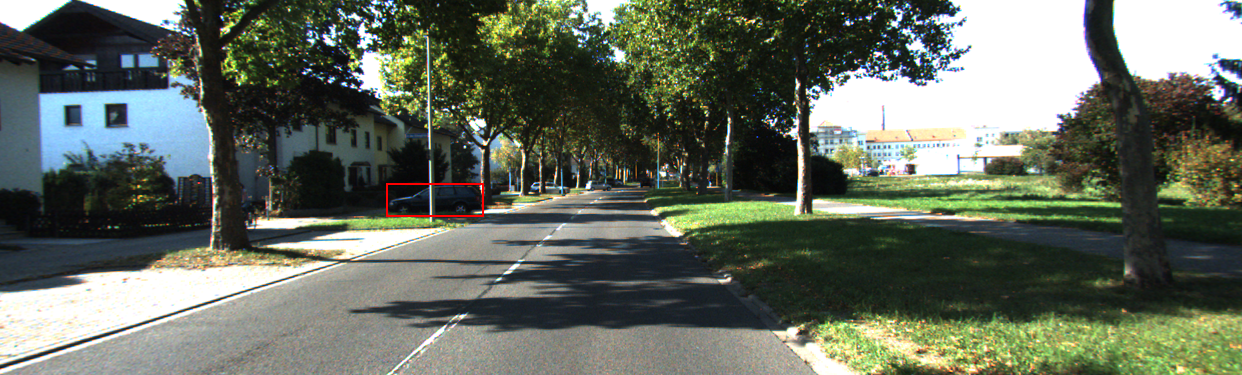

In [6]:
# Ïù¥ÎØ∏ÏßÄÏùò Î∞îÏö¥Îî© Î∞ïÏä§(bounding box, bbox) ÌôïÏù∏
# Ïù¥ÎØ∏ÏßÄ ÏúÑÏóê Î∞îÏö¥Îî© Î∞ïÏä§Î•º Í∑∏Î†§ ÌôîÎ©¥Ïóê ÌëúÏãú
def visualize_bbox(input_image, object_bbox):
    input_image = copy.deepcopy(input_image)
    draw = ImageDraw.Draw(input_image)

    # Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú(x_min, x_max, y_min, y_max) Íµ¨ÌïòÍ∏∞
    # bbox = (y_min, x_min, y_max, x_max)
    # object['bbox'] = (left, top, right, bottom pixel coordinates)
    width, height = img.size
    x_min = object_bbox[:,1] * width
    x_max = object_bbox[:,3] * width
    y_max = height - object_bbox[:,0] * height  ###### heightÏóêÏÑú ÎπºÎäî Ïù¥Ïú†?
    y_min = height - object_bbox[:,2] * height  ###### heightÏóêÏÑú ÎπºÎäî Ïù¥Ïú†?

    # Î∞îÏö¥Îî© Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
    rects = np.stack([x_min, y_min, x_max, y_max], axis=1)
    for _rect in rects:
        draw.rectangle(_rect, outline=(255,0,0), width=2)

    return input_image

visualize_bbox(img, objects['bbox'].numpy())

* [Focal Loss for Dense Object Detection](https://arxiv.org/abs/1708.02002)
* 1-stage detector Î™®Îç∏Ïù∏ YOLOÏôÄ SSDÎäî 2-stage detectorÏù∏ Faster-RCNN Îì±Î≥¥Îã§ ÏÜçÎèÑÎäî Îπ†Î•¥ÏßÄÎßå ÏÑ±Îä•Ïù¥ ÎÇÆÏùÄ Î¨∏Ï†úÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎã§. 
* RetinaNetÏóêÏÑúÎäî **focal loss**ÏôÄ **FPN(Feature Pyramid Network)** Î•º Ï†ÅÏö©Ìïú ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏÇ¨Ïö©ÌïúÎã§.

### 3. Preparing Data

### 3.1 Build a Data Pipeline

* Î®ºÏ†Ä Ï£ºÏñ¥ÏßÑ KITTI Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏóê ÎßûÎäî ÌòïÌÉúÎ°ú Î∞îÍøîÏ§ÄÎã§.
* Ïù¥Îïå ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Íµ¨Ï∂ïÌïúÎã§.
  1. xÏôÄ yÏ¢åÌëú ÏúÑÏπò ÍµêÏ≤¥
  2. Î¨¥ÏûëÏúÑÎ°ú ÏàòÌèâ Îí§ÏßëÍ∏∞(Flip)
  3. Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Ï°∞Ï†ï Î∞è Ìå®Îî© Ï∂îÍ∞Ä
  4. Ï¢åÌëúÍ≥ÑÎ•º [x_min, y_min, x_max, y_max]ÏóêÏÑú [x_min, y_min, width, height]ÏúºÎ°ú ÏàòÏ†ï

<p align='middle'><img src = 'https://www.w3resource.com/w3r_images/numpy-manipulation-stack-function-image-2.png' width='150'></p>

In [7]:
# xÏôÄ yÏ¢åÌëú ÏúÑÏπò ÍµêÏ≤¥
# object['bbox'] = (left, top, right, bottom pixel coordinates)
def swap_xy(boxes):
    return tf.stack([boxes[:, 1], boxes[:, 0], boxes[:, 3], boxes[:, 2]], axis=-1)

print('üå∏~')

üå∏~


<p align='middle'><img src='https://media.vlpt.us/images/mjk3136/post/d00f957a-b26e-41cf-9acf-78857240e099/image.png'></p>

In [8]:
# Î¨¥ÏûëÏúÑÎ°ú ÏàòÌèâ Îí§ÏßëÍ∏∞(flip)
def random_flip_horizontal(image, boxes):
    # tf.random.uniform() : 0~1ÍπåÏßÄ ÎûúÎçòÌïú ÎÇúÏàò ÏÉùÏÑ±
    if tf.random.uniform(()) > 0.5:  # 50%Ïùò ÌôïÎ•†Î°ú Ïù¥ÎØ∏ÏßÄÎ•º Ï¢åÏö∞Î°ú Îí§ÏßëÍ∏∞ Ï†ÅÏö©
        image = tf.image.flip_left_right(image)
        # object['bbox'] = (left, top, right, bottom pixel coordinates)
        # Ïù¥ÎØ∏ÏßÄÍ∞Ä Îí§ÏßëÏñ¥Ïßà Í≤ΩÏö∞ bboxÎèÑ Í∞ôÏù¥ Îí§ÏßëÏñ¥Ï†∏Ïïº ÌïúÎã§.
        # x, yÏ¢åÌëúÏùò ÏúÑÏπòÍ∞Ä Î≥ÄÍ≤ΩÎêú Ïù¥ÌõÑ Îí§ÏßëÍ∏∞ Ï†ÅÏö© : (1-x1), y1, (1-x2), y2
        boxes = tf.stack( 
           [1 - boxes[:, 2], boxes[:, 1], 1 - boxes[:, 0], boxes[:, 3]], axis=-1
        )

    return image, boxes

print('üå∏~')

üå∏~


* Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º Î∞îÍøÄ Îïå Í≥†Î†§Ìï† Ï†ê
  * Ïù¥ÎØ∏ÏßÄÏùò ÎπÑÏú® Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ
  * Ïù¥ÎØ∏ÏßÄÏùò ÏµúÎåÄ/ÏµúÏÜå ÌÅ¨Í∏∞ Ï†úÌïú
  * Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º Î∞îÍæº ÌõÑÏóêÎèÑ ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Î™®Îç∏Ïóê ÏûÖÎ†•ÎêòÎäî Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Îäî strideÏùò Î∞∞ÏàòÍ∞Ä Îê† Í≤É

In [9]:
# Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à Î≥ÄÍ≤Ω Î∞è Ìå®Îî© Ï∂îÍ∞Ä
def resize_and_pad_image(image, training=True):
    
    min_side = 800.0
    max_side = 1333.0
    min_side_range = [640, 1024]
    stride = 128.0
    
    # Ïù¥ÎØ∏ÏßÄÎ•º `tf.cast`Î•º ÌÜµÌï¥ float32ÌòïÌÉúÎ°ú Î∞îÍøîÏ§ÄÎã§.
    image_shape = tf.cast(tf.shape(image)[:2], dtype=tf.float32)
    # training ÏÑ∏Ìä∏Ïù¥Î©¥ 
    if training:
        # 640 ~ 1024 ÏÇ¨Ïù¥Ïùò ÎÇúÏàòÎ•º Í∫ºÎÇ¥ min_sideÏóê Ï†ÄÏû•ÌïúÎã§.
        min_side = tf.random.uniform((), min_side_range[0], min_side_range[1], dtype=tf.float32)
    
    # ÎπÑÏú® = min_side/Ïù¥ÎØ∏ÏßÄ shapeÏùò Í∞ÄÏû• ÏûëÏùÄ Í∞íÏúºÎ°ú ÎÇòÎàà Í∞í
    ratio = min_side / tf.reduce_min(image_shape)

    # ÎπÑÏú® * Ïù¥ÎØ∏ÏßÄ shapeÏùò Í∞ÄÏû• ÌÅ∞ Í∞í > 1333.0Î≥¥Îã§ ÌÅ¨Î©¥
    if ratio * tf.reduce_max(image_shape) > max_side:
        # ÎπÑÏú® = 1333.0 / Ïù¥ÎØ∏ÏßÄ shapeÏùò Í∞ÄÏû• ÌÅ∞ Í∞í
        ratio = max_side / tf.reduce_max(image_shape)
    
    # Ïù¥ÎØ∏ÏßÄ shape = ÎπÑÏú® * Ïù¥ÎØ∏ÏßÄ shape
    image_shape = ratio * image_shape
    # Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÎ•º Î≥ÄÍ≤ΩÌïúÎã§.
    image = tf.image.resize(image, tf.cast(image_shape, dtype=tf.int32))
    # Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º Î∞îÍæº ÌõÑÏóêÎèÑ ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Î™®Îç∏Ïóê ÏûÖÎ†•ÎêòÎäî Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Îäî strideÏùò Î∞∞ÏàòÍ∞Ä Îê† Í≤É
    # Ìå®Îî© ÏßÑÌñâ
    padded_image_shape = tf.cast(
        tf.math.ceil(image_shape / stride) * stride, dtype=tf.int32
    )
    image = tf.image.pad_to_bounding_box(
        image, 0, 0, padded_image_shape[0], padded_image_shape[1]
    )
    return image, image_shape, ratio

print('üå∏~')

üå∏~


* Ï∞∏Í≥†ÏûêÎ£å
```python
def box_corner_to_center(boxes):
    """Convert from (upper_left, bottom_right) to (center, width, height)""" 
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3] 
    cx = (x1 + x2) / 2 
    cy = (y1 + y2) / 2 
    w = x2 - x1 
    h = y2 - y1 
    boxes = torch.stack((cx, cy, w, h), axis=-1) 
    return boxes
```

In [10]:
# Ï¢åÌëúÎì§ÏùÑ width, heightÎ°ú Î≥ÄÍ≤Ω
# bboxÏùò Ï§ëÏã¨ x, y Ï¢åÌëú Î∞è width, heightÍ∞Ä Î∞òÌôòÎêúÎã§.
def convert_to_xywh(boxes):
    return tf.concat(
        [(boxes[..., :2] + boxes[..., 2:]) / 2.0, boxes[..., 2:] - boxes[..., :2]],
        axis=-1,
    )

print('üå∏~')

üå∏~


In [11]:
# ÏúÑÏóêÏÑú ÎßåÎì† Ìï®ÏàòÎì§ Ïó∞Í≤∞
def preprocess_data(sample):
    image = sample["image"]
    bbox = swap_xy(sample["objects"]["bbox"])
    class_id = tf.cast(sample["objects"]["type"], dtype=tf.int32)

    image, bbox = random_flip_horizontal(image, bbox)
    image, image_shape, _ = resize_and_pad_image(image)

    bbox = tf.stack(
        [
            bbox[:, 0] * image_shape[1],
            bbox[:, 1] * image_shape[0],
            bbox[:, 2] * image_shape[1],
            bbox[:, 3] * image_shape[0],
        ],
        axis=-1,
    )
    bbox = convert_to_xywh(bbox)
    return image, bbox, class_id

print('üå∏~')

üå∏~


### 3.2 Encoding

In [12]:
# AnchorBox ÏÉùÏÑ±
class AnchorBox:
    def __init__(self):
        self.aspect_ratios = [0.5, 1.0, 2.0]
        self.scales = [2 ** x for x in [0, 1 / 3, 2 / 3]]

        self._num_anchors = len(self.aspect_ratios) * len(self.scales)
        self._strides = [2 ** i for i in range(3, 8)]
        self._areas = [x ** 2 for x in [32.0, 64.0, 128.0, 256.0, 512.0]]
        self._anchor_dims = self._compute_dims()

    def _compute_dims(self):
        anchor_dims_all = []
        for area in self._areas:
            anchor_dims = []
            for ratio in self.aspect_ratios:
                anchor_height = tf.math.sqrt(area / ratio)
                anchor_width = area / anchor_height
                dims = tf.reshape(
                    tf.stack([anchor_width, anchor_height], axis=-1), [1, 1, 2]
                )
                for scale in self.scales:
                    anchor_dims.append(scale * dims)
            anchor_dims_all.append(tf.stack(anchor_dims, axis=-2))
        return anchor_dims_all

    def _get_anchors(self, feature_height, feature_width, level):
        rx = tf.range(feature_width, dtype=tf.float32) + 0.5
        ry = tf.range(feature_height, dtype=tf.float32) + 0.5
        centers = tf.stack(tf.meshgrid(rx, ry), axis=-1) * self._strides[level - 3]
        centers = tf.expand_dims(centers, axis=-2)
        centers = tf.tile(centers, [1, 1, self._num_anchors, 1])
        dims = tf.tile(
            self._anchor_dims[level - 3], [feature_height, feature_width, 1, 1]
        )
        anchors = tf.concat([centers, dims], axis=-1)
        return tf.reshape(
            anchors, [feature_height * feature_width * self._num_anchors, 4]
        )

    def get_anchors(self, image_height, image_width):
        anchors = [
            self._get_anchors(
                tf.math.ceil(image_height / 2 ** i),
                tf.math.ceil(image_width / 2 ** i),
                i,
            )
            for i in range(3, 8)
        ]
        return tf.concat(anchors, axis=0)

print('üå∏~')

üå∏~


In [13]:
# IoU Í≥ÑÏÇ∞
def convert_to_corners(boxes):
    return tf.concat(
        [boxes[..., :2] - boxes[..., 2:] / 2.0, boxes[..., :2] + boxes[..., 2:] / 2.0],
        axis=-1,
    )

def compute_iou(boxes1, boxes2):
    boxes1_corners = convert_to_corners(boxes1)
    boxes2_corners = convert_to_corners(boxes2)
    lu = tf.maximum(boxes1_corners[:, None, :2], boxes2_corners[:, :2])
    rd = tf.minimum(boxes1_corners[:, None, 2:], boxes2_corners[:, 2:])
    intersection = tf.maximum(0.0, rd - lu)
    intersection_area = intersection[:, :, 0] * intersection[:, :, 1]
    boxes1_area = boxes1[:, 2] * boxes1[:, 3]
    boxes2_area = boxes2[:, 2] * boxes2[:, 3]
    union_area = tf.maximum(
        boxes1_area[:, None] + boxes2_area - intersection_area, 1e-8
    )
    return tf.clip_by_value(intersection_area / union_area, 0.0, 1.0)

print('üå∏~')

üå∏~


In [14]:
# Ïã§Ï†ú ÎùºÎ≤®ÏùÑ Anchor BoxÏóê ÎßûÏ∂∞Ï£ºÎäî ÌÅ¥ÎûòÏä§
class LabelEncoder:

    def __init__(self):
        self._anchor_box = AnchorBox()
        self._box_variance = tf.convert_to_tensor(
            [0.1, 0.1, 0.2, 0.2], dtype=tf.float32
        )

    def _match_anchor_boxes(
        self, anchor_boxes, gt_boxes, match_iou=0.5, ignore_iou=0.4
    ):
        iou_matrix = compute_iou(anchor_boxes, gt_boxes)
        max_iou = tf.reduce_max(iou_matrix, axis=1)
        matched_gt_idx = tf.argmax(iou_matrix, axis=1)
        positive_mask = tf.greater_equal(max_iou, match_iou)
        negative_mask = tf.less(max_iou, ignore_iou)
        ignore_mask = tf.logical_not(tf.logical_or(positive_mask, negative_mask))
        return (
            matched_gt_idx,
            tf.cast(positive_mask, dtype=tf.float32),
            tf.cast(ignore_mask, dtype=tf.float32),
        )

    def _compute_box_target(self, anchor_boxes, matched_gt_boxes):
        box_target = tf.concat(
            [
                (matched_gt_boxes[:, :2] - anchor_boxes[:, :2]) / anchor_boxes[:, 2:],
                tf.math.log(matched_gt_boxes[:, 2:] / anchor_boxes[:, 2:]),
            ],
            axis=-1,
        )
        box_target = box_target / self._box_variance
        return box_target

    def _encode_sample(self, image_shape, gt_boxes, cls_ids):
        anchor_boxes = self._anchor_box.get_anchors(image_shape[1], image_shape[2])
        cls_ids = tf.cast(cls_ids, dtype=tf.float32)
        matched_gt_idx, positive_mask, ignore_mask = self._match_anchor_boxes(
            anchor_boxes, gt_boxes
        )
        matched_gt_boxes = tf.gather(gt_boxes, matched_gt_idx)
        box_target = self._compute_box_target(anchor_boxes, matched_gt_boxes)
        matched_gt_cls_ids = tf.gather(cls_ids, matched_gt_idx)
        cls_target = tf.where(
            tf.not_equal(positive_mask, 1.0), -1.0, matched_gt_cls_ids
        )
        cls_target = tf.where(tf.equal(ignore_mask, 1.0), -2.0, cls_target)
        cls_target = tf.expand_dims(cls_target, axis=-1)
        label = tf.concat([box_target, cls_target], axis=-1)
        return label

    def encode_batch(self, batch_images, gt_boxes, cls_ids):
        images_shape = tf.shape(batch_images)
        batch_size = images_shape[0]

        labels = tf.TensorArray(dtype=tf.float32, size=batch_size, dynamic_size=True)
        for i in range(batch_size):
            label = self._encode_sample(images_shape, gt_boxes[i], cls_ids[i])
            labels = labels.write(i, label)
        batch_images = tf.keras.applications.resnet.preprocess_input(batch_images)
        return batch_images, labels.stack()
    
print('üå∏~')

üå∏~


### 4. Build the Model

### 4.1 Feature Pyramid

<p align='middle'><img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fwsui0%2FbtqUuL9T7LI%2F18lKd5H2I0JKMyKY1Q180k%2Fimg.png' width='300'></p>

<p align='middle'><img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fk9LUD%2FbtqUtXbErVx%2F1mZ793U5mBK5KgJPqsR9qK%2Fimg.png' width='600'></p>

<p align='middle'><img src = 'https://d3s0tskafalll9.cloudfront.net/media/original_images/gc-4v2-p-5-1.png' width='450'></p>

In [15]:
class FeaturePyramid(tf.keras.layers.Layer):

    def __init__(self, backbone):
        super(FeaturePyramid, self).__init__(name="FeaturePyramid")
        self.backbone = backbone
        self.conv_c3_1x1 = tf.keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c4_1x1 = tf.keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c5_1x1 = tf.keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c3_3x3 = tf.keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c4_3x3 = tf.keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c5_3x3 = tf.keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c6_3x3 = tf.keras.layers.Conv2D(256, 3, 2, "same")
        self.conv_c7_3x3 = tf.keras.layers.Conv2D(256, 3, 2, "same")
        self.upsample_2x = tf.keras.layers.UpSampling2D(2)

    def call(self, images, training=False):
        c3_output, c4_output, c5_output = self.backbone(images, training=training)
        p3_output = self.conv_c3_1x1(c3_output)
        p4_output = self.conv_c4_1x1(c4_output)
        p5_output = self.conv_c5_1x1(c5_output)
        p4_output = p4_output + self.upsample_2x(p5_output)
        p3_output = p3_output + self.upsample_2x(p4_output)
        p3_output = self.conv_c3_3x3(p3_output)
        p4_output = self.conv_c4_3x3(p4_output)
        p5_output = self.conv_c5_3x3(p5_output)
        p6_output = self.conv_c6_3x3(c5_output)
        p7_output = self.conv_c7_3x3(tf.nn.relu(p6_output))
        return p3_output, p4_output, p5_output, p6_output, p7_output

print('üå∏~')

üå∏~


<p align='middle'><img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FqjSwj%2FbtqWTYe0Nzt%2FjYBgbiNmSdaBIYiVTY8yMk%2Fimg.png' width='600'></p>

In [16]:
# classÎ•º ÏòàÏ∏°ÌïòÎäî headÏôÄ boxÎ•º ÏòàÏ∏°ÌïòÎäî head
def build_head(output_filters, bias_init):
    head = tf.keras.Sequential([tf.keras.Input(shape=[None, None, 256])])
    kernel_init = tf.initializers.RandomNormal(0.0, 0.01)
    for _ in range(4):
        head.add(
            tf.keras.layers.Conv2D(256, 3, padding="same", kernel_initializer=kernel_init)
        )
        head.add(tf.keras.layers.ReLU())
    head.add(
        tf.keras.layers.Conv2D(
            output_filters,
            3,
            1,
            padding="same",
            kernel_initializer=kernel_init,
            bias_initializer=bias_init,
        )
    )
    return head

print('üå∏~')

üå∏~


In [17]:
# RetinaNetÏùò backbone : ResNet50
# FPNÏóê Ïù¥Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù Ï§ëÍ∞Ñ Î†àÏù¥Ïñ¥ÎèÑ outputÏúºÎ°ú Ïó∞Í≤∞
def get_backbone():
    backbone = tf.keras.applications.ResNet50(
        include_top=False, input_shape=[None, None, 3]
    )
    c3_output, c4_output, c5_output = [
        backbone.get_layer(layer_name).output
        for layer_name in ["conv3_block4_out", "conv4_block6_out", "conv5_block3_out"]
    ]
    return tf.keras.Model(
        inputs=[backbone.inputs], outputs=[c3_output, c4_output, c5_output]
    )

print('üå∏~')

üå∏~


In [18]:
# RetinaNet
# Backbone + FPN + classificationÏö© head + boxÏö© head 
class RetinaNet(tf.keras.Model):

    def __init__(self, num_classes, backbone):
        super(RetinaNet, self).__init__(name="RetinaNet")
        self.fpn = FeaturePyramid(backbone)
        self.num_classes = num_classes

        prior_probability = tf.constant_initializer(-np.log((1 - 0.01) / 0.01))
        self.cls_head = build_head(9 * num_classes, prior_probability)
        self.box_head = build_head(9 * 4, "zeros")

    def call(self, image, training=False):
        features = self.fpn(image, training=training)
        N = tf.shape(image)[0]
        cls_outputs = []
        box_outputs = []
        for feature in features:
            box_outputs.append(tf.reshape(self.box_head(feature), [N, -1, 4]))
            cls_outputs.append(
                tf.reshape(self.cls_head(feature), [N, -1, self.num_classes])
            )
        cls_outputs = tf.concat(cls_outputs, axis=1)
        box_outputs = tf.concat(box_outputs, axis=1)
        return tf.concat([box_outputs, cls_outputs], axis=-1)

print('üå∏~')

üå∏~


### 4.2 Loss

In [19]:
class RetinaNetBoxLoss(tf.losses.Loss):

    def __init__(self, delta):
        super(RetinaNetBoxLoss, self).__init__(
            reduction="none", name="RetinaNetBoxLoss"
        )
        self._delta = delta

    def call(self, y_true, y_pred):
        difference = y_true - y_pred
        absolute_difference = tf.abs(difference)
        squared_difference = difference ** 2
        loss = tf.where(
            tf.less(absolute_difference, self._delta),
            0.5 * squared_difference,
            absolute_difference - 0.5,
        )
        return tf.reduce_sum(loss, axis=-1)


class RetinaNetClassificationLoss(tf.losses.Loss):

    def __init__(self, alpha, gamma):
        super(RetinaNetClassificationLoss, self).__init__(
            reduction="none", name="RetinaNetClassificationLoss"
        )
        self._alpha = alpha
        self._gamma = gamma

    def call(self, y_true, y_pred):
        cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=y_true, logits=y_pred
        )
        probs = tf.nn.sigmoid(y_pred)
        alpha = tf.where(tf.equal(y_true, 1.0), self._alpha, (1.0 - self._alpha))
        pt = tf.where(tf.equal(y_true, 1.0), probs, 1 - probs)
        loss = alpha * tf.pow(1.0 - pt, self._gamma) * cross_entropy
        return tf.reduce_sum(loss, axis=-1)


class RetinaNetLoss(tf.losses.Loss):

    def __init__(self, num_classes=8, alpha=0.25, gamma=2.0, delta=1.0):
        super(RetinaNetLoss, self).__init__(reduction="auto", name="RetinaNetLoss")
        self._clf_loss = RetinaNetClassificationLoss(alpha, gamma)
        self._box_loss = RetinaNetBoxLoss(delta)
        self._num_classes = num_classes

    def call(self, y_true, y_pred):
        y_pred = tf.cast(y_pred, dtype=tf.float32)
        box_labels = y_true[:, :, :4]
        box_predictions = y_pred[:, :, :4]
        cls_labels = tf.one_hot(
            tf.cast(y_true[:, :, 4], dtype=tf.int32),
            depth=self._num_classes,
            dtype=tf.float32,
        )
        cls_predictions = y_pred[:, :, 4:]
        positive_mask = tf.cast(tf.greater(y_true[:, :, 4], -1.0), dtype=tf.float32)
        ignore_mask = tf.cast(tf.equal(y_true[:, :, 4], -2.0), dtype=tf.float32)
        clf_loss = self._clf_loss(cls_labels, cls_predictions)
        box_loss = self._box_loss(box_labels, box_predictions)
        clf_loss = tf.where(tf.equal(ignore_mask, 1.0), 0.0, clf_loss)
        box_loss = tf.where(tf.equal(positive_mask, 1.0), box_loss, 0.0)
        normalizer = tf.reduce_sum(positive_mask, axis=-1)
        clf_loss = tf.math.divide_no_nan(tf.reduce_sum(clf_loss, axis=-1), normalizer)
        box_loss = tf.math.divide_no_nan(tf.reduce_sum(box_loss, axis=-1), normalizer)
        loss = clf_loss + box_loss
        return loss

print('üå∏~')

üå∏~


### 5. Model Training

In [20]:
# ÎßåÎì§Ïñ¥ ÎÜìÏùÄ ÌÅ¥ÎûòÏä§ÏôÄ Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ÏÑú Î™®Îç∏ÏùÑ Ï°∞Î¶Ω
num_classes = 8
batch_size = 8

resnet50_backbone = get_backbone()
loss_fn = RetinaNetLoss(num_classes)
model = RetinaNet(num_classes, resnet50_backbone)

print('üå∏~')

94781440/94765736 [==============================] - 1s 0us/step
üå∏~


In [21]:
# ÎÖºÎ¨∏ÏóêÏÑúÎäî 8Í∞úÏùò GPUÎ•º ÏÇ¨Ïö©ÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ïö∞Î¶¨ ÌôòÍ≤ΩÍ≥ºÎäî ÎßûÏßÄ ÏïäÎäîÎã§.
# Í∑∏ÎûòÏÑú Learning RateÎ•º Ï†ÅÏ†àÌûà Î∞îÍøîÏ§ÄÎã§.
learning_rates = [2.5e-06, 0.000625, 0.00125, 0.0025, 0.00025, 2.5e-05]
learning_rate_boundaries = [125, 250, 500, 240000, 360000]
learning_rate_fn = tf.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=learning_rate_boundaries, values=learning_rates
)
optimizer = tf.optimizers.SGD(learning_rate=learning_rate_fn, momentum=0.9)
model.compile(loss=loss_fn, optimizer=optimizer)

In [22]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌïú ÌååÏù¥ÌîÑÎùºÏù∏ÎèÑ ÎßåÎì§Í∏∞
label_encoder = LabelEncoder()
(train_dataset, val_dataset), dataset_info = tfds.load(
    "kitti", split=["train", "validation"], with_info=True, data_dir=DATA_PATH
)

autotune = tf.data.AUTOTUNE
train_dataset = train_dataset.map(preprocess_data, num_parallel_calls=autotune)
train_dataset = train_dataset.shuffle(8 * batch_size)
train_dataset = train_dataset.padded_batch(
    batch_size=batch_size, padding_values=(0.0, 1e-8, -1), drop_remainder=True
)
train_dataset = train_dataset.map(
    label_encoder.encode_batch, num_parallel_calls=autotune
)
train_dataset = train_dataset.prefetch(autotune)

val_dataset = val_dataset.map(preprocess_data, num_parallel_calls=autotune)
val_dataset = val_dataset.padded_batch(
    batch_size=1, padding_values=(0.0, 1e-8, -1), drop_remainder=True
)
val_dataset = val_dataset.map(label_encoder.encode_batch, num_parallel_calls=autotune)
val_dataset = val_dataset.prefetch(autotune)

print('üå∏~')

üå∏~


In [23]:
# Î™®Îç∏ ÌïôÏäµ
model_dir = '/content/sample_data/object_detection/data/checkpoints'
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(model_dir, "weights" + "_epoch_{epoch}"),
        monitor="loss",
        save_best_only=False,
        save_weights_only=True,
        verbose=1,
    )
]

epochs = 20

model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=callbacks_list
)

Epoch 1/20
793/793 [==============================] - ETA: 0s - loss: 2.8064
Epoch 1: saving model to /content/sample_data/object_detection/data/checkpoints/weights_epoch_1
793/793 [==============================] - 761s 931ms/step - loss: 2.8064 - val_loss: 1.8638
Epoch 2/20
793/793 [==============================] - ETA: 0s - loss: 1.2062
Epoch 2: saving model to /content/sample_data/object_detection/data/checkpoints/weights_epoch_2
793/793 [==============================] - 739s 930ms/step - loss: 1.2062 - val_loss: 1.4055
Epoch 3/20
793/793 [==============================] - ETA: 0s - loss: 0.8447
Epoch 3: saving model to /content/sample_data/object_detection/data/checkpoints/weights_epoch_3
793/793 [==============================] - 740s 930ms/step - loss: 0.8447 - val_loss: 1.2955
Epoch 4/20
793/793 [==============================] - ETA: 0s - loss: 0.6745
Epoch 4: saving model to /content/sample_data/object_detection/data/checkpoints/weights_epoch_4
793/793 [====================

### 6. Check the Results

In [24]:
# ÌïôÏäµÎêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model_dir = '/content/sample_data/object_detection/data/checkpoints'
latest_checkpoint = tf.train.latest_checkpoint(model_dir)
model.load_weights(latest_checkpoint)

print('üå∏~')

üå∏~


In [25]:
# Î™®Îç∏Ïùò Ï∂îÎ°† Í≤∞Í≥ºÎ•º Ï≤òÎ¶¨Ìï† Ìï®ÏàòÎ•º Î†àÏù¥Ïñ¥ ÌòïÏãùÏúºÎ°ú ÎßåÎì†Îã§.
# 100Í∞úÏùò ÌõÑÎ≥¥Îßå Í≥®Îùº Ï≤òÎ¶¨
# `tf.image.combined_non_max_suppression` ÏÇ¨Ïö©
class DecodePredictions(tf.keras.layers.Layer):

    def __init__(
        self,
        num_classes=8,
        confidence_threshold=0.05,
        nms_iou_threshold=0.5,
        max_detections_per_class=100,
        max_detections=100,
        box_variance=[0.1, 0.1, 0.2, 0.2]
    ):
        super(DecodePredictions, self).__init__()
        self.num_classes = num_classes
        self.confidence_threshold = confidence_threshold
        self.nms_iou_threshold = nms_iou_threshold
        self.max_detections_per_class = max_detections_per_class
        self.max_detections = max_detections

        self._anchor_box = AnchorBox()
        self._box_variance = tf.convert_to_tensor(
            box_variance, dtype=tf.float32
        )

    def _decode_box_predictions(self, anchor_boxes, box_predictions):
        boxes = box_predictions * self._box_variance
        boxes = tf.concat(
            [
                boxes[:, :, :2] * anchor_boxes[:, :, 2:] + anchor_boxes[:, :, :2],
                tf.math.exp(boxes[:, :, 2:]) * anchor_boxes[:, :, 2:],
            ],
            axis=-1,
        )
        boxes_transformed = convert_to_corners(boxes)
        return boxes_transformed

    def call(self, images, predictions):
        image_shape = tf.cast(tf.shape(images), dtype=tf.float32)
        anchor_boxes = self._anchor_box.get_anchors(image_shape[1], image_shape[2])
        box_predictions = predictions[:, :, :4]
        cls_predictions = tf.nn.sigmoid(predictions[:, :, 4:])
        boxes = self._decode_box_predictions(anchor_boxes[None, ...], box_predictions)

        return tf.image.combined_non_max_suppression(
            tf.expand_dims(boxes, axis=2),
            cls_predictions,
            self.max_detections_per_class,
            self.max_detections,
            self.nms_iou_threshold,
            self.confidence_threshold,
            clip_boxes=False,
        )

print('üå∏~')

üå∏~


In [26]:
# Ï∂îÎ°†Ïù¥ Í∞ÄÎä•Ìïú Î™®Îç∏ÏùÑ Ï°∞Î¶Ω
image = tf.keras.Input(shape=[None, None, 3], name="image")
predictions = model(image, training=False)
detections = DecodePredictions(confidence_threshold=0.5)(image, predictions)
inference_model = tf.keras.Model(inputs=image, outputs=detections)

print('üå∏~')

üå∏~


In [27]:
# Î™®Îç∏Ïùò Ï∂îÎ°† Í≤∞Í≥º ÏãúÍ∞ÅÌôî Ìï®Ïàò
def visualize_detections(
    image, boxes, classes, scores, figsize=(7, 7), linewidth=1, color=[0, 0, 1]
):
    image = np.array(image, dtype=np.uint8)
    plt.figure(figsize=figsize)
    plt.axis("off")
    plt.imshow(image)
    ax = plt.gca()
    for box, _cls, score in zip(boxes, classes, scores):
        text = "{}: {:.2f}".format(_cls, score)
        x1, y1, x2, y2 = box
        w, h = x2 - x1, y2 - y1
        y1 = image.shape[0] - y2
        patch = plt.Rectangle(
            [x1, y1], w, h, fill=False, edgecolor=color, linewidth=linewidth
        )
        ax.add_patch(patch)
        ax.text(
            x1,
            y1,
            text,
            bbox={"facecolor": color, "alpha": 0.4},
            clip_box=ax.clipbox,
            clip_on=True,
        )
    plt.show()
    return ax

print('üå∏~')

üå∏~


In [28]:
# Ï∂îÎ°† Ïãú ÏûÖÎ†•Îç∞Ïù¥ÌÑ∞Î•º Ï†ÑÏ≤òÎ¶¨ÌïòÍ∏∞ ÏúÑÌïú Ìï®Ïàò
# ÌïôÏäµÏùÑ ÏúÑÌïú Ï†ÑÏ≤òÎ¶¨ÏôÄ Ï∂îÎ°†ÏùÑ ÏúÑÌïú Ï†ÑÏ≤òÎ¶¨Í∞Ä Îã§Î•¥Í∏∞ ÎïåÎ¨∏Ïóê Îî∞Î°ú ÏûëÏÑ±ÎêúÎã§.
def prepare_image(image):
    image, _, ratio = resize_and_pad_image(image, training=False)
    image = tf.keras.applications.resnet.preprocess_input(image)
    return tf.expand_dims(image, axis=0), ratio

print('üå∏~')

üå∏~


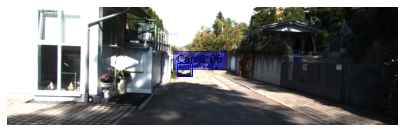

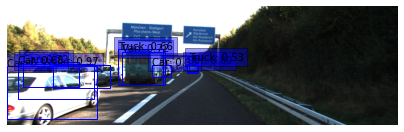

In [29]:
# ÌïôÏäµÎêú Í≤∞Í≥ºÎ•º ÌôïÏù∏ÌïúÎã§.
test_dataset = tfds.load("kitti", split="test", data_dir=DATA_PATH)
int2str = dataset_info.features["objects"]["type"].int2str

for sample in test_dataset.take(2):
    image = tf.cast(sample["image"], dtype=tf.float32)
    input_image, ratio = prepare_image(image)
    detections = inference_model.predict(input_image)
    num_detections = detections.valid_detections[0]
    class_names = [
        int2str(int(x)) for x in detections.nmsed_classes[0][:num_detections]
    ]
    visualize_detections(
        image,
        detections.nmsed_boxes[0][:num_detections] / ratio,
        class_names,
        detections.nmsed_scores[0][:num_detections],
    )

### 7. Creating an Autonomous Driving System

* ÏûÖÎ†•ÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÎ•º Î∞õÎäîÎã§.
* Ï†ïÏßÄÏ°∞Í±¥Ïóê ÎßûÎäî Í≤ΩÏö∞ "Stop" ÏïÑÎãå Í≤ΩÏö∞ "Go"Î•º Î∞òÌôòÌïúÎã§.
* Ï°∞Í±¥ÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§.
  * ÏÇ¨ÎûåÏù¥ Ìïú Î™Ö Ïù¥ÏÉÅ ÏûàÎäî Í≤ΩÏö∞
  * Ï∞®ÎüâÏùò ÌÅ¨Í∏∞(width or height)Í∞Ä 300pxÏù¥ÏÉÅÏù∏ Í≤ΩÏö∞

### 7.1 Autonomous Driving System

In [34]:
def self_drive_assist(img_path, size_limit=300, visualize=True):
    image = Image.open(img_path)
    image = np.array(image)
    image = tf.cast(image, dtype=tf.float32)
    input_image, ratio = prepare_image(image)
    detections = inference_model.predict(input_image)
    num_detections = detections.valid_detections[0]
    class_names = [
        int2str(int(x)) for x in detections.nmsed_classes[0][:num_detections]
    ]
    boxes = detections.nmsed_boxes[0][:num_detections] / ratio
    classes = class_names
    scores = detections.nmsed_scores[0][:num_detections]

    # display images
    if visualize:
        result = 'Go'
        for box, score, _cls in zip(boxes, scores, classes):

            x1, y1, x2, y2 = box
            w, h = x2 - x1, y2 - y1
            y1 = image.shape[0] - y2
            
            if w >= size_limit or h >= size_limit or _cls == 'Pedestrian':
                result = 'Stop'
            else:
                result = 'Go'

        image = np.array(image, dtype=np.uint8)
        plt.axis("off")
        plt.imshow(image)

        text = "{}: {:.2f}".format(_cls, score)
        ax = plt.gca()
        color = [0, 0, 1]
        patch = plt.Rectangle(
            [x1, y1], w, h, fill=False, edgecolor=color, linewidth=1
        )
        ax.add_patch(patch)
        ax.text(
            x1,
            y1,
            text,
            bbox={"facecolor": color, "alpha": 0.4},
            clip_box=ax.clipbox,
            clip_on=True,
        )
        plt.show()


    return result

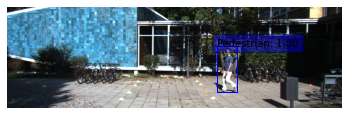

Stop


In [35]:
img_path = '/content/sample_data/object_detection/data/stop_1.png'
print(self_drive_assist(img_path))

### 7.2 System Evaluating

In [36]:
import os

def test_system(func):
    work_dir = '/content/sample_data/object_detection/data'
    score = 0
    test_set=[
        ("stop_1.png", "Stop"),
        ("stop_2.png", "Stop"),
        ("stop_3.png", "Stop"),
        ("stop_4.png", "Stop"),
        ("stop_5.png", "Stop"),
        ("go_1.png", "Go"),
        ("go_2.png", "Go"),
        ("go_3.png", "Go"),
        ("go_4.png", "Go"),
        ("go_5.png", "Go"),
    ]
    
    for image_file, answer in test_set:
        image_path = work_dir + '/' + image_file
        pred = self_drive_assist(image_path)
        print(image_file)
        print(f'prediction: {pred}, answer: {answer}\n')
        if pred == answer:
            score += 10
    print(f"{score}Ï†êÏûÖÎãàÎã§.")

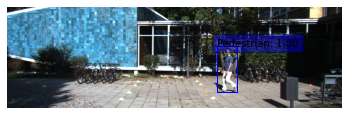

stop_1.png
prediction: Stop, answer: Stop



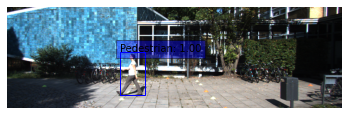

stop_2.png
prediction: Stop, answer: Stop



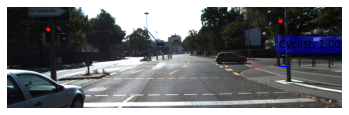

stop_3.png
prediction: Go, answer: Stop



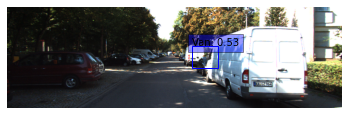

stop_4.png
prediction: Go, answer: Stop



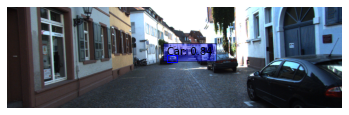

stop_5.png
prediction: Go, answer: Stop



go_1.png
prediction: Go, answer: Go



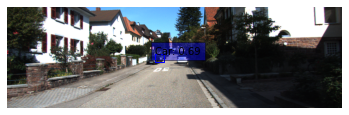

go_2.png
prediction: Go, answer: Go



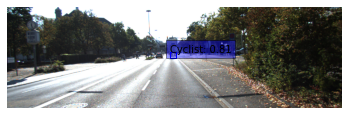

go_3.png
prediction: Go, answer: Go



go_4.png
prediction: Go, answer: Go



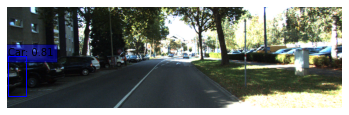

go_5.png
prediction: Go, answer: Go

70Ï†êÏûÖÎãàÎã§.


In [37]:
test_system(self_drive_assist)

* ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Î¨ºÏ≤¥Î•º Ï†úÎåÄÎ°ú Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÎäî Í≤ΩÏö∞Îì§Ïù¥ Î∞úÏÉùÌïòÍ≥† ÏûàÎã§.
* ÏòàÏÉÅÎêòÎäî ÏõêÏù∏Îì§ Ï§ë Í∞ÄÏû• Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏñ¥Î≥¥Ïù¥Îäî Ïù¥Ïú†Îäî ÌïôÏäµÏù¥ Ï†úÎåÄÎ°ú Ïù¥Î£®Ïñ¥ÏßÄÏßÄ Î™ªÌïú Í≤ΩÏö∞Ïù¥Îã§.


### 8. Retrospection

### 8.1 What was difficult

* Ï†ïÏùòÎêú classÏôÄ Ìï®ÏàòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏïÑ ÏΩîÎìúÎ•º Ïù¥Ìï¥ÌïòÍ∏∞ ÌûòÎì§ÏóàÎã§.
* ÏΩîÎìúÏÉÅ boxÎ•º Í∑∏Î¶¨Îäî Î∂ÄÎ∂ÑÏóêÏÑú ÌãÄÎ¶∞ Î∂ÄÎ∂ÑÏù¥ ÏûàÏñ¥ ÏõêÏù∏ÏùÑ Ï∞æÎäîÍ≤å ÌûòÎì§ÏóàÎã§.
* 1 epoch Îãπ ÌïôÏäµÌïòÎäî ÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ Í∏∏Îã§üò•

### 8.2 What I found out

1. `PIL.Image.fromarray(obj, mode=None)`
*  Î∞∞Ïó¥ Í∞ùÏ≤¥Î•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÏïÑ Î∞∞Ïó¥ Í∞ùÏ≤¥ÏóêÏÑú ÎßåÎì† Ïù¥ÎØ∏ÏßÄ Í∞ùÏ≤¥Î•º Î∞òÌôò
* `obj` : Object with array interface
* `mode` : Optional mode to use when reading `obj`. Will be determined from type if `None`.

2. `numpy.stack(arrays, axis=0, out=None)`
* ÏÉà Ï∂ïÏùÑ Îî∞Îùº Î∞∞Ïó¥ ÏãúÌÄÄÏä§Î•º Í≤∞Ìï©
<p align='middle'><img src = 'https://miro.medium.com/max/1050/1*lFZzE9PgKTRR8jlFI4EUtw.png' height='300'></p>

3. `tf.stack(values, axis=0, name='stack')`
* `values` : A list of Tensor objects with the same shape and type.
* `output` : A stacked Tensor with the same type as values.
* This is the opposite of unstack. 
* The numpy equivalent is `np.stack`
```python
>>> np.array_equal(np.stack([x, y, z]), tf.stack([x, y, z]))
True
```

4. `tf.math.reduce_min(input_tensor, axis=None, keepdims=False, name=None)`
* ÌÖêÏÑú Ï∞®ÏõêÏóê Í±∏Ï≥ê ÏöîÏÜåÏùò `tf.math.minimum`ÏùÑ Í≥ÑÏÇ∞ÌïúÎã§.

5. `tf.math.reduce_max(input_tensor, axis=None, keepdims=False, name=None)`
* ÌÖêÏÑú Ï∞®ÏõêÏóê Í±∏Ï≥ê ÏöîÏÜåÏùò `tf.math.maximum`ÏùÑ Í≥ÑÏÇ∞ÌïúÎã§.
* `axis` : Ï§ÑÏùº Ï∞®ÏõêÏù¥Îã§. ÎßåÏïΩ None (the default)Ïù¥Î©¥, Î™®Îì† Ï∞®ÏõêÏùÑ Ï§ÑÏù∏Îã§. Î≤îÏúÑÎäî Î¨¥Ï°∞Í±¥ `[-rank(input_tensor),rank(input_tensor))`Ïù¥Ïó¨Ïïº ÌïúÎã§.

6. `tf.math.ceil(x, name=None)`
* ÏûÖÎ†•Ïùò ÏÉÅÌïúÏÑ†ÏùÑ ÏöîÏÜåÎ≥ÑÎ°ú Î∞òÌôò
* -Í∞íÏùÄ Î≤ÑÎ¶º, +Í∞íÏùÄ Ïò¨Î¶ºÏ≤òÎ¶¨

### 8.3 What I want to know more about

* RetinaNetÏùÑ ÏôÑÏ†ÑÌûà Ïù¥Ìï¥Ìïú Í≤ÉÏùÄ ÏïÑÎãàÏó¨ÏÑú Îçî Í≥µÎ∂ÄÎ•º Ìï¥ÏïºÌï† Í≤É Í∞ôÎã§.

### 8.4 Self-Resolution

* ÏûêÏú®Ï£ºÌñâÏãúÏä§ÌÖú ÌèâÍ∞ÄÌïòÎäî Î∂ÄÎ∂Ñ ÏΩîÎìúÎ•º Ïß§ Îïå ÏãúÍ∞ÑÎèÑ ÎßéÏù¥ Í±∏Î†∏Í≥†, ÏÉùÍ∞ÅÎåÄÎ°ú ÏΩîÎî©Ïù¥ Ïûò ÎêòÏßÄÏïäÏïÑ ÎãµÎãµÌñàÎã§.